#ML Assignment 1

##Importing Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Save it as CSV if needed
df.to_csv("california_housing.csv", index=False)


##1) Linear Regression

Mean Squared Error: 0.7091
R-squared Score: 0.4589


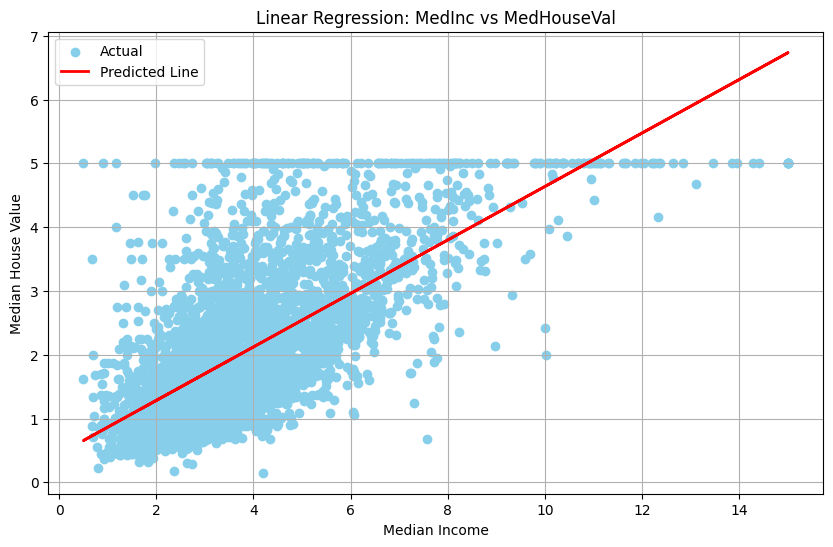

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("california_housing.csv")

# Use only one feature (MedInc) for simple 2D regression
X = df[['MedInc']]
y = df['MedHouseVal']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='skyblue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title("Linear Regression: MedInc vs MedHouseVal")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()

let’s improve the model’s performance step-by-step by moving from:

Simple 1-feature Linear Regression
to
Multi-feature Linear Regression (Multivariate)

✅ Improved Model Results:
Mean Squared Error (MSE): 0.5559
Root MSE: 0.7456
R-squared Score (R²): 0.5758


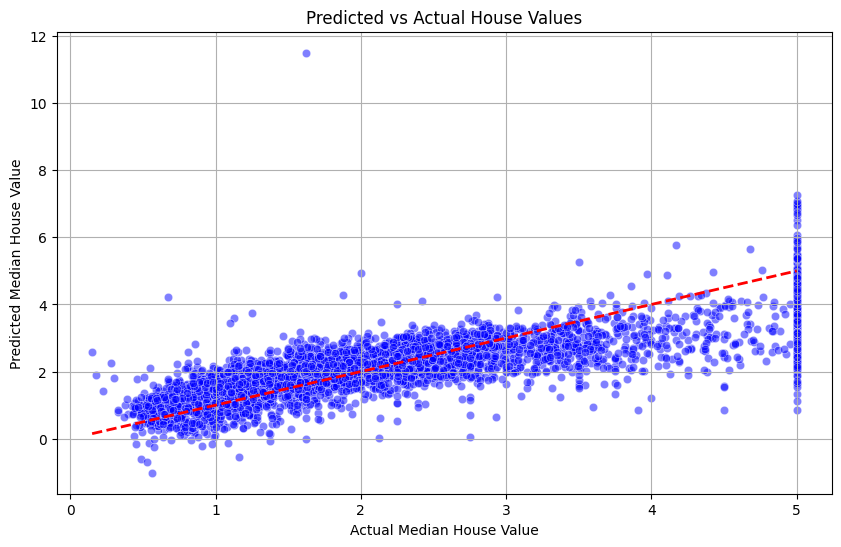

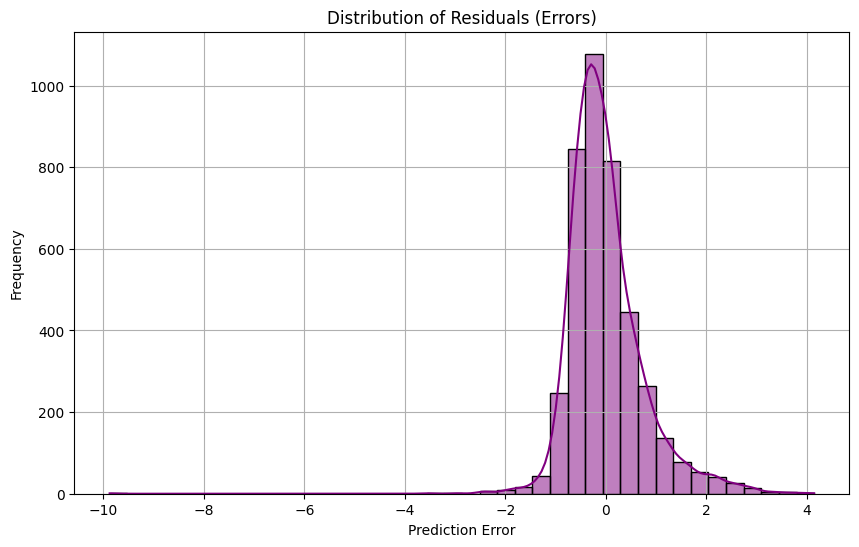

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("california_housing.csv")

# Features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Improved Model Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root MSE: {np.sqrt(mse):.4f}")
print(f"R-squared Score (R²): {r2:.4f}")

# ---------------------------
# 🎨 Visualization
# ---------------------------

# 1. Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.title("Predicted vs Actual House Values")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=40)
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#2) Polynomial Regression

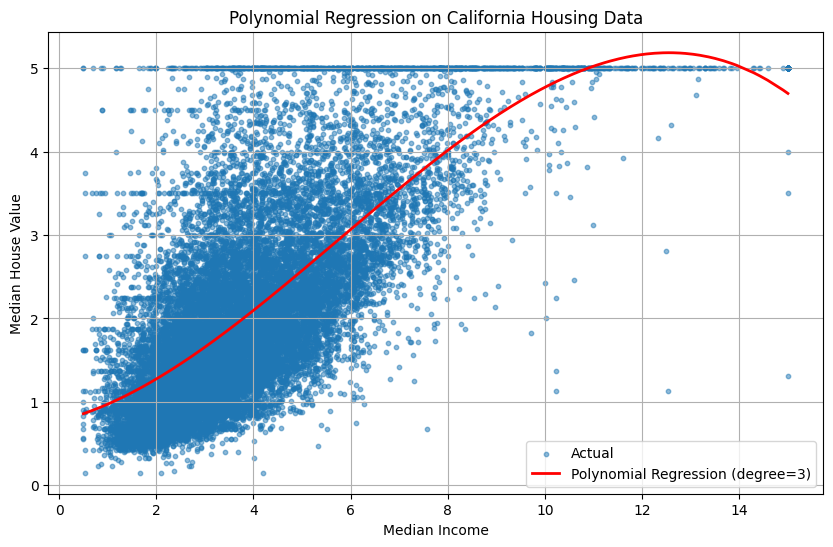

Mean Squared Error: 0.6842
R-squared Score: 0.4862


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("california_housing.csv")

# Use only one feature for 2D visualization
X = df[['MedInc']]  # Median Income
y = df['MedHouseVal']

# Sort for better plotting
sort_idx = np.argsort(X.values.flatten())
X_sorted = X.values[sort_idx]
y_sorted = y.values[sort_idx]

# Polynomial Transformation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_sorted)

# Train the model
model = LinearRegression()
model.fit(X_poly, y_sorted)

# Predict
y_pred = model.predict(X_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_sorted, y_sorted, s=10, alpha=0.5, label="Actual")
plt.plot(X_sorted, y_pred, color='red', linewidth=2, label="Polynomial Regression (degree=3)")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Polynomial Regression on California Housing Data")
plt.legend()
plt.grid(True)
plt.show()

# Metrics
mse = mean_squared_error(y_sorted, y_pred)
r2 = r2_score(y_sorted, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

#3) Ridge Regression


Mean Squared Error: 0.5558
R^2 Score: 0.5759


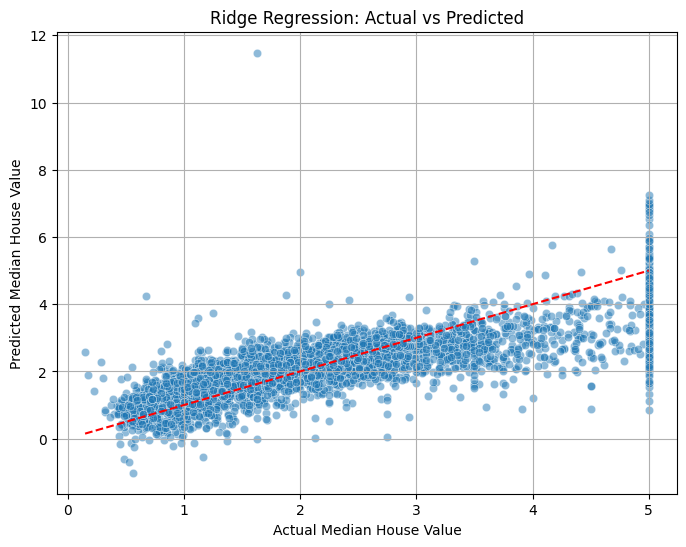

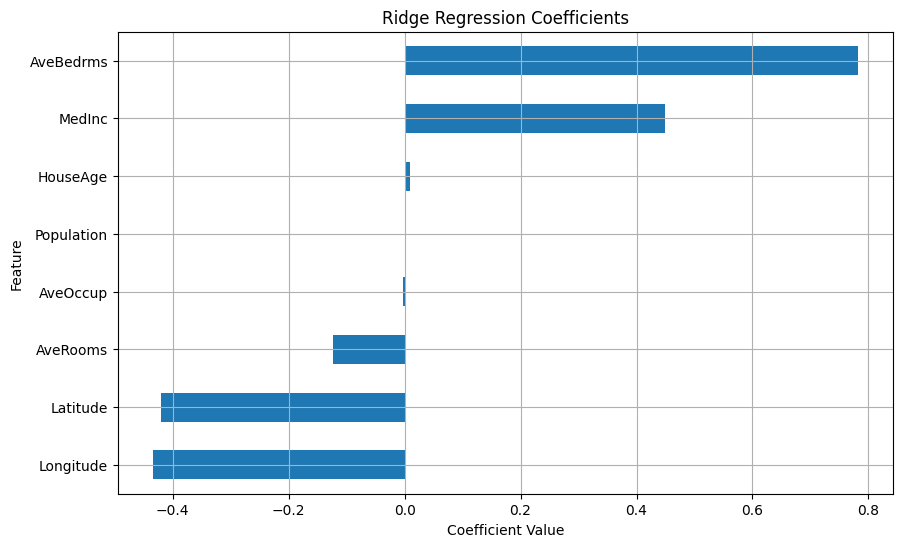

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Define features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict on test set
y_pred = ridge.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# Visualization: Coefficients
plt.figure(figsize=(10,6))
coef = pd.Series(ridge.coef_, index=X.columns)
coef.sort_values().plot(kind='barh')
plt.title("Ridge Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

#4) Lasso Regression

Mean Squared Error: 0.6796290284328825
R-squared: 0.48136113250290735


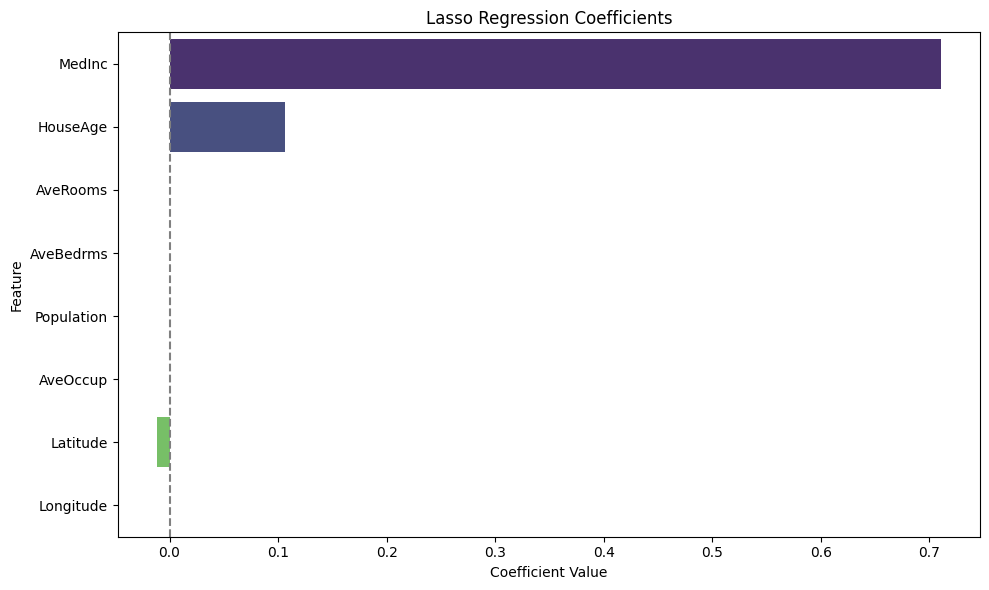

In [8]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Split into features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize Lasso coefficients
coef = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(10,6))
sns.barplot(x=coef.values, y=coef.index, palette="viridis")
plt.title("Lasso Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

#5) Elastic Net Regression

Mean Squared Error: 0.6359
R² Score: 0.5148


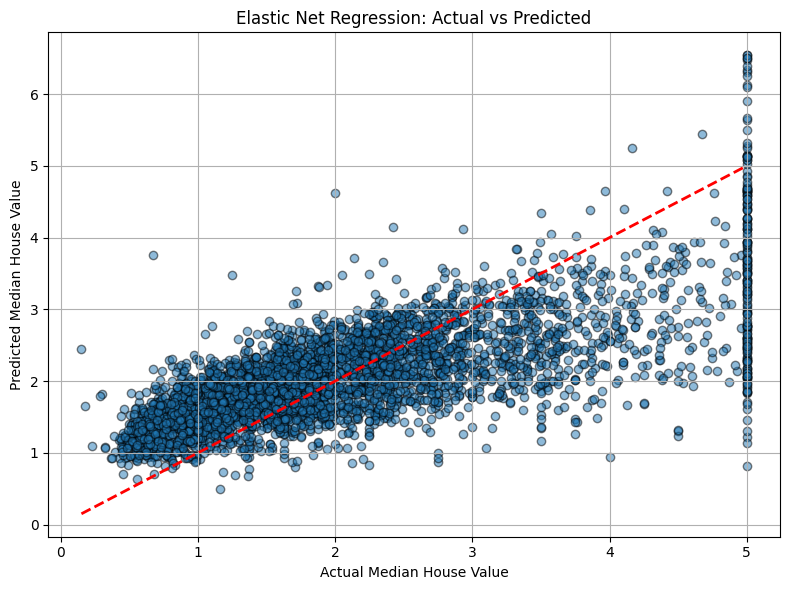

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Feature matrix and target vector
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Elastic Net model
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualization: Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Elastic Net Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

#6) Support Vector Regression (SVR)

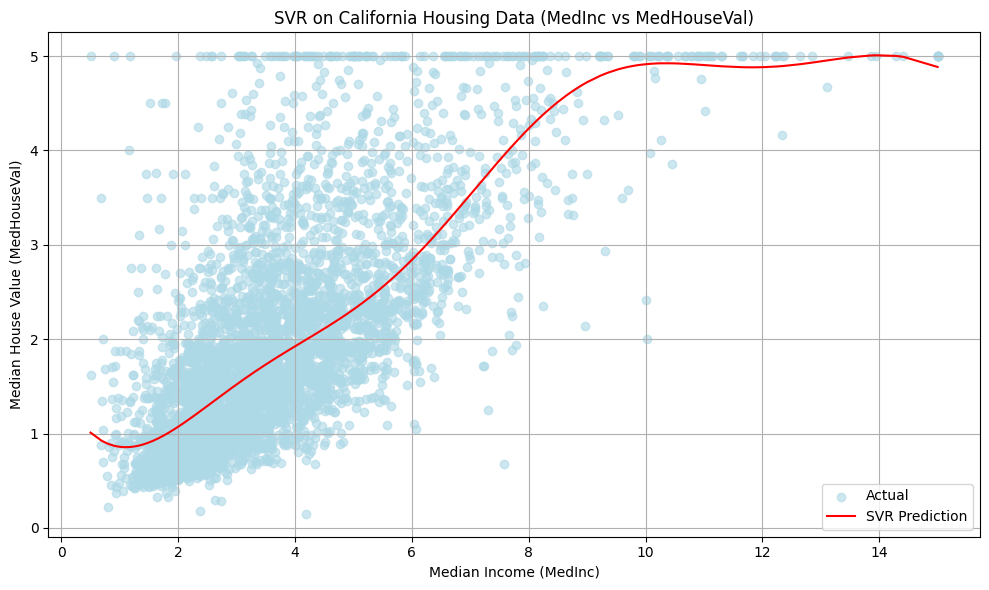

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Choose one feature for 2D visualization
X = df[['MedInc']].values  # Median income
y = df['MedHouseVal'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

# Predict
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Visualization
# Sort for better line plot
X_test_sorted, y_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test.ravel(), y_test, y_pred)))

plt.figure(figsize=(10, 6))
plt.scatter(X_test_sorted, y_test_sorted, color='lightblue', label='Actual', alpha=0.6)
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='SVR Prediction')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.title('SVR on California Housing Data (MedInc vs MedHouseVal)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#7) Decision Tree Regression

Mean Squared Error: 0.98


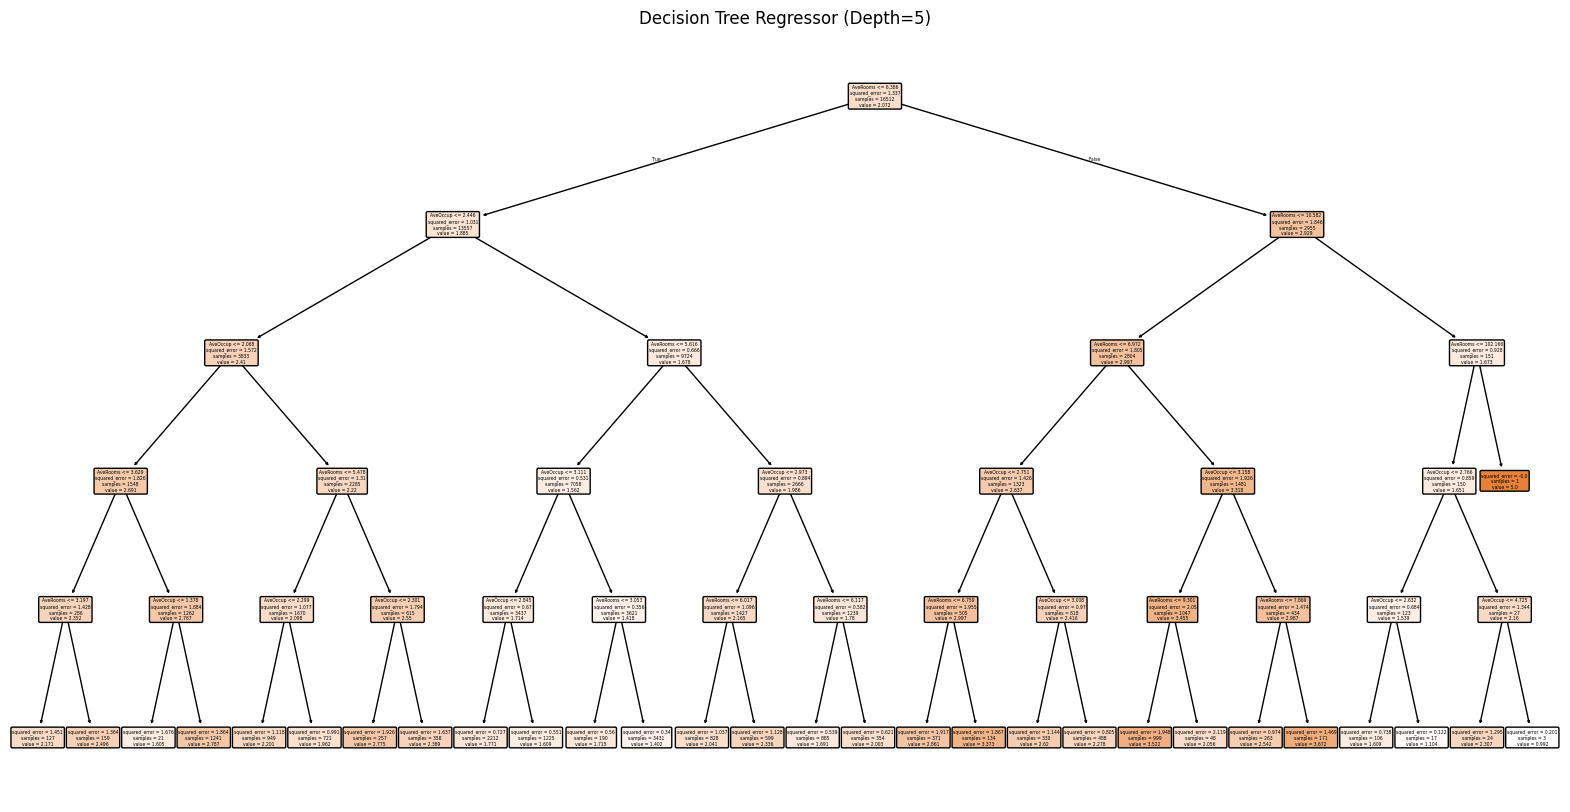

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


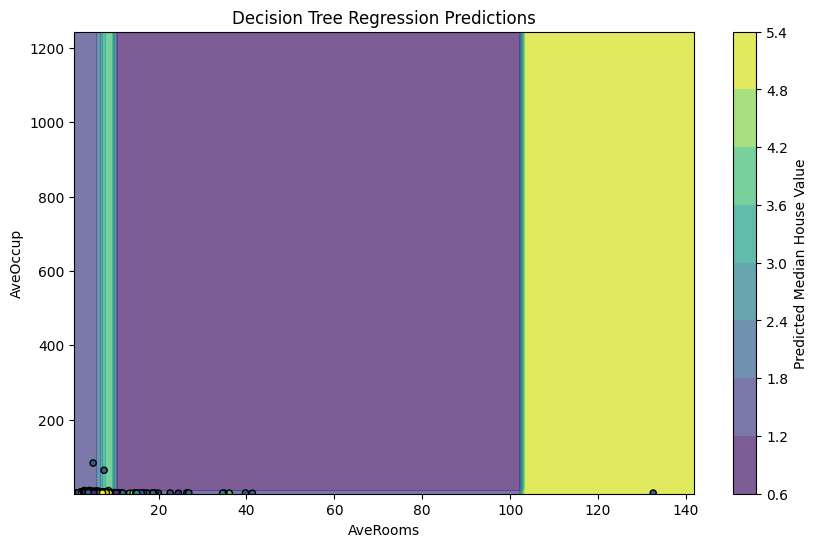

In [12]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Feature selection (use only 2 features for visualization)
features = ['AveRooms', 'AveOccup']
X = df[features]
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=features, filled=True, rounded=True)
plt.title("Decision Tree Regressor (Depth=5)")
plt.show()

# 2D prediction visualization
import numpy as np
x_min, x_max = X[features[0]].min(), X[features[0]].max()
y_min, y_max = X[features[1]].min(), X[features[1]].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.7)
plt.scatter(X_test[features[0]], X_test[features[1]], c=y_test, edgecolor='k', cmap='viridis', s=20)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Decision Tree Regression Predictions')
plt.colorbar(contour, label='Predicted Median House Value')
plt.show()

#8) Random Forest Regression (Optional)

Mean Squared Error: 0.26
R² Score: 0.81


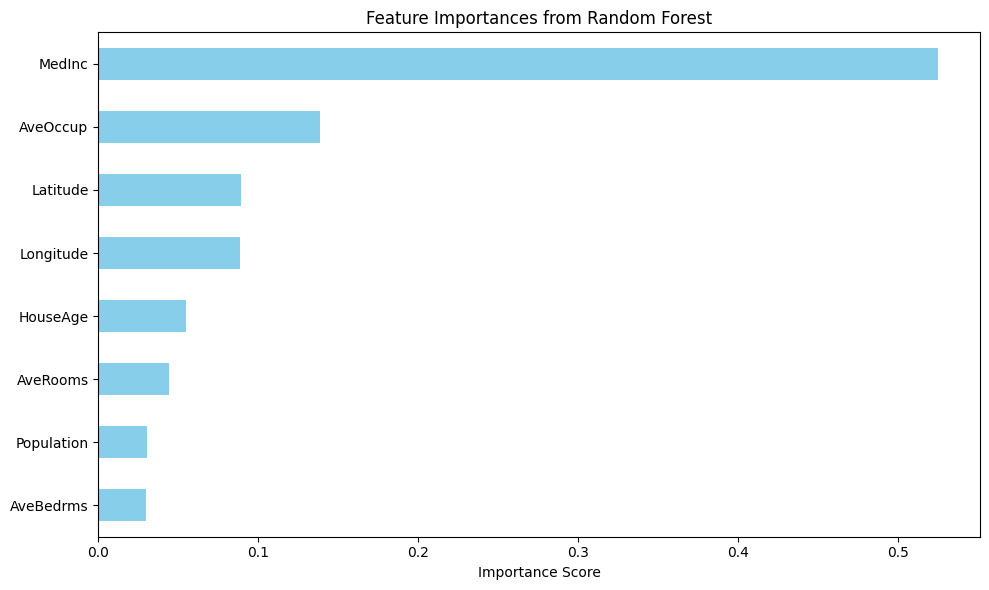

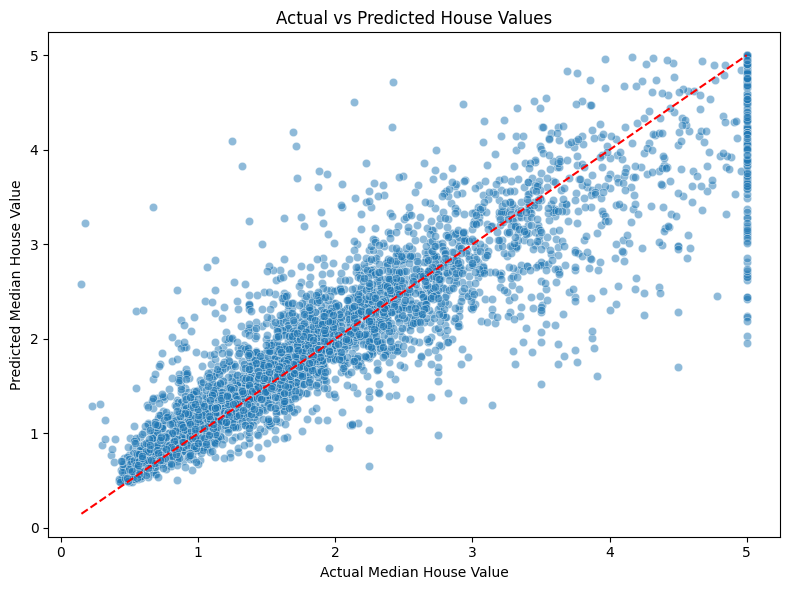

In [13]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Train-test split
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.tight_layout()
plt.show()

#Comparision of these regression models

                      Model  R² Score       MSE
5             Random Forest  0.805123  0.255368
6         Gradient Boosting  0.775645  0.293997
4             Decision Tree  0.622076  0.495235
1          Ridge Regression  0.575855  0.555803
0         Linear Regression  0.575788  0.555892
3     ElasticNet Regression  0.416552  0.764556
2          Lasso Regression  0.284167  0.938034
7  Support Vector Regressor -0.016485  1.332012


<ipython-input-14-8dc4efbab5af>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R² Score", palette="viridis")


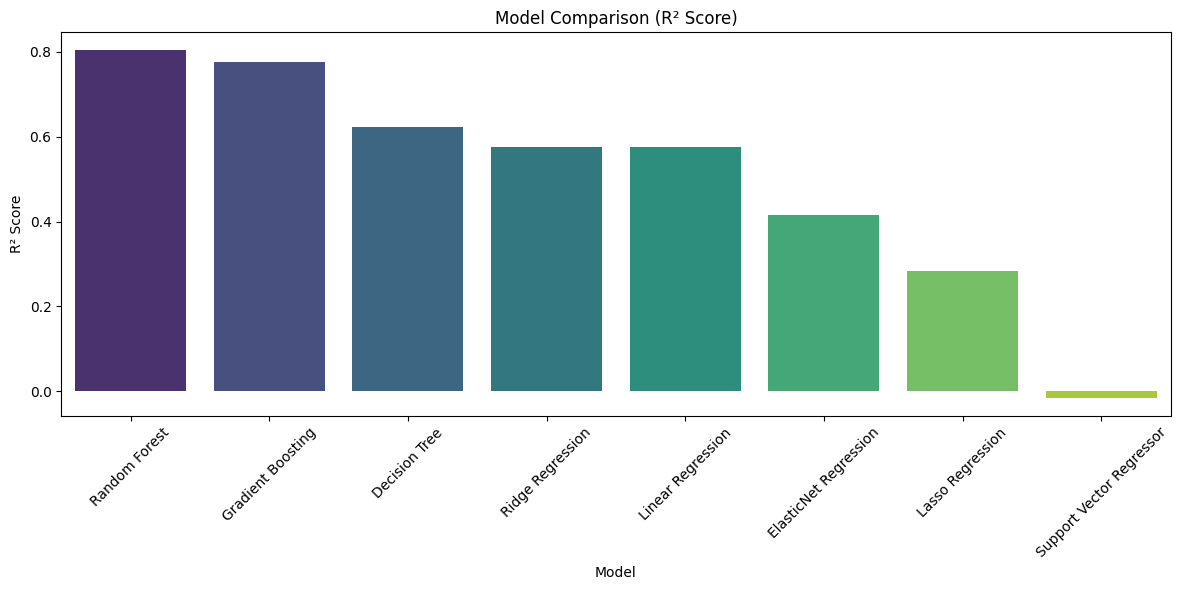

<ipython-input-14-8dc4efbab5af>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="MSE", palette="magma")


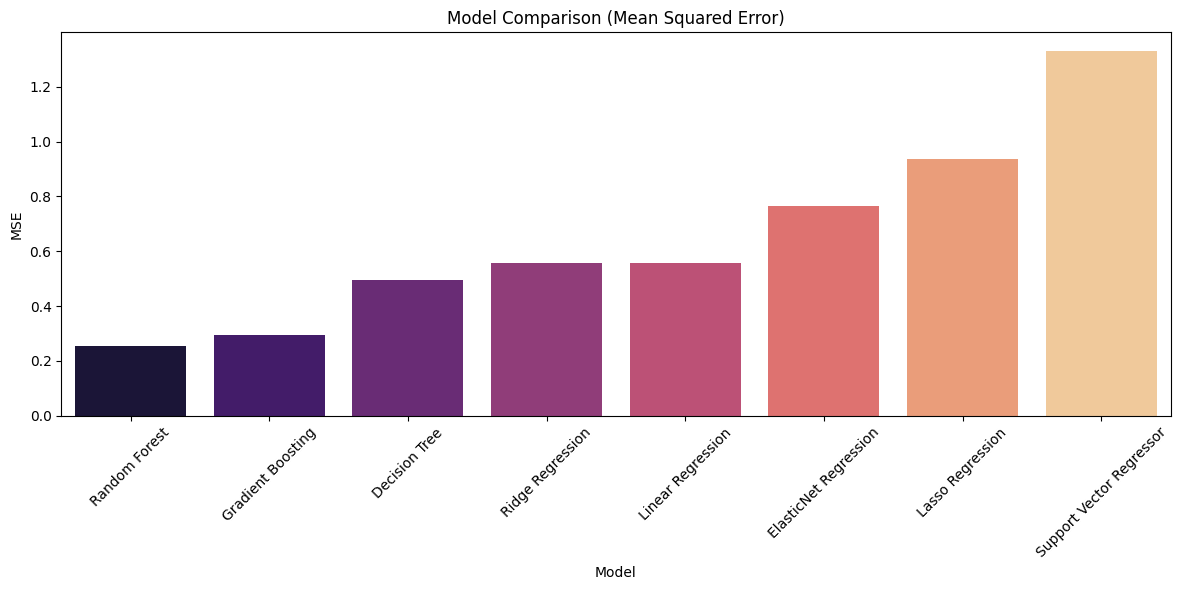

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Train-test split
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train, predict and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "R² Score": r2, "MSE": mse})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)

# Display results
print(results_df)

# Visualize results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Model", y="R² Score", palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Model", y="MSE", palette="magma")
plt.title("Model Comparison (Mean Squared Error)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()